<a href="https://colab.research.google.com/github/weasel-codes/google-colab/blob/udemy-dl/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
Learn how Linear Regression works with gradient descent algorithm and finally implement it on any new data set and make predictions. Analyze the Learning rate and step size values.

Broad view of steps that I will be performing to carry out this task :
* Visualize my dataset by plotting behaviour of dependent variables wrt independent variables to understand my dataset better.
* Experiment around with different step sizes and learning rate until I reach satisfying result and plot behaviour of Cost function vs learning rate
* Use this to predict test data



# Step 1 : Dataset Import, Preprocessing  and Inisght 

## Dataset Import
* We have Independent variables : age, sex, bmi, children, smoker, region
* We are trying to predict : Insurance Charges for an input
* I will be considering 500 records from the dataset for this assignment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import Dataset
dataset = pd.read_csv('insurance.csv')
X = dataset.iloc[:500,:-1].values
Y = dataset.iloc[:500,-1].values

## Dataset Preview
* Previewing 10 sample data of dataset
* Also plotting histograms to view how data is spread across features

In [ ]:
print(dataset.iloc[:10,:])

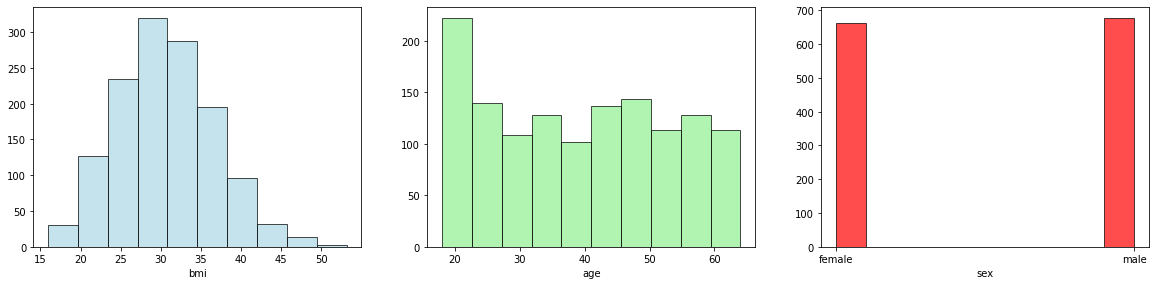

In [3]:
# Distribution of the continuous features individually
# Only plotting for bmi, age, sex
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
plt.hist(dataset.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(dataset.age, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(dataset.sex, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('sex')

plt.show()

## Dataset Preprocessing
* We need to perform some preprocessing steps on data to make it usable for calculation
* It has been checked that there are no missing values in dataset
* **Sex** is converted into binary numbers with 0 = Female and 1 = Male
* **Smoking** is converted into binary with 0 = no and 1 = yes
* **Region** is classified as 0:SW, 1:SE, 2:NW, 3:NE

Corresponding block does preprocessing and displays changes in first 10 rows

In [4]:
#Encoding Categorical Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1]) # 0:female, 1:male
X[:,4] = le.fit_transform(X[:,4]) # 0:No, 1:Yes
X[:,5] = le.fit_transform(X[:,5]) # 0:SW, 1:SE, 2:NW, 3:NE
print(X[:10,:])

[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 [33 1 22.705 0 0 1]
 [32 1 28.88 0 0 1]
 [31 0 25.74 0 0 2]
 [46 0 33.44 1 0 2]
 [37 0 27.74 3 0 1]
 [37 1 29.83 2 0 0]
 [60 0 25.84 0 0 1]]


## Splitting Dataset into Training and Testing Data

In [5]:
#Splitting Dataset into training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Plotting Independent Variables vs Independent Variables
After splitting data into dependent and independent variables I am trying to get some insights from data. Here are observations gathered from below desplayed graphs:

* Insurance Charges increases for people who smoke when compared to people who dont.
* As Age increase, Increase in Insurance charges can be observed.
* Gender doesnt have much effect on insurance charges.



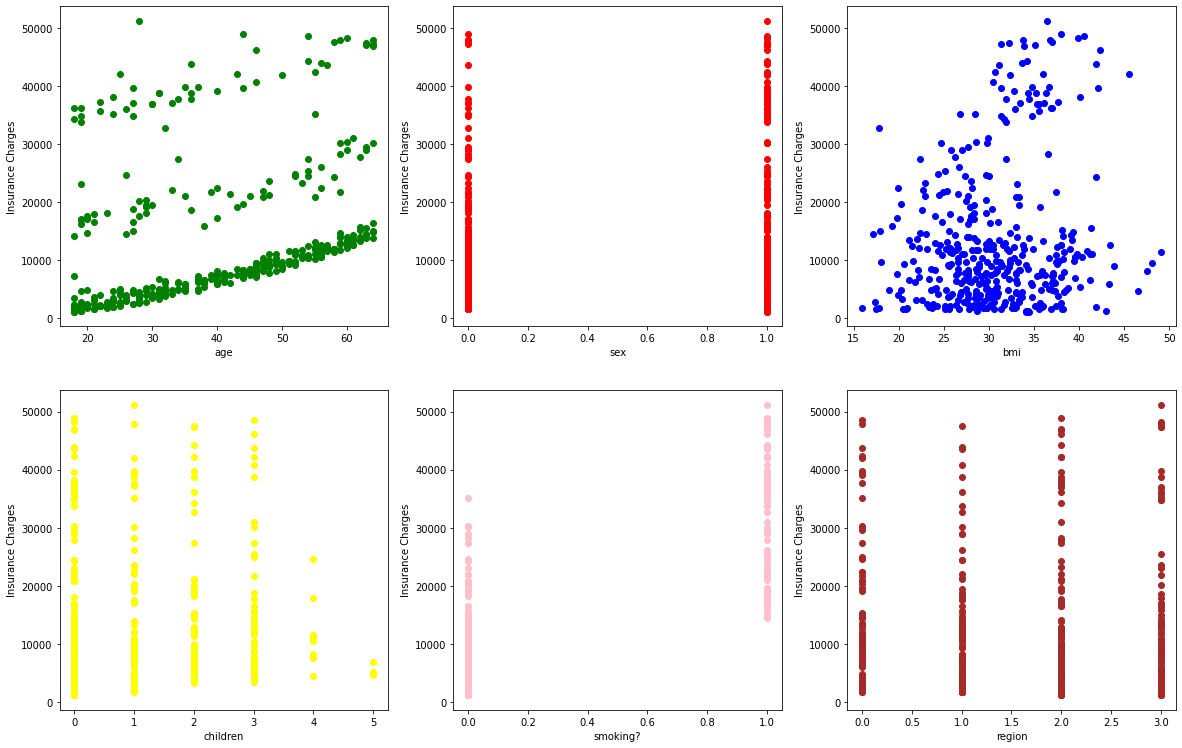

In [6]:
plt.figure(figsize= (20,20))

plt.subplot(3,3,1)
plt.scatter(X_train[:,0], Y_train, color='green')
plt.xlabel('age')
plt.ylabel('Insurance Charges')

plt.subplot(3,3,2)
plt.scatter(X_train[:,1], Y_train, color='red')
plt.xlabel('sex')
plt.ylabel('Insurance Charges')

plt.subplot(3,3,3)
plt.scatter(X_train[:,2], Y_train, color='blue')
plt.xlabel('bmi')
plt.ylabel('Insurance Charges')

plt.subplot(3,3,4)
plt.scatter(X_train[:,3], Y_train, color='yellow')
plt.xlabel('children')
plt.ylabel('Insurance Charges')

plt.subplot(3,3,5)
plt.scatter(X_train[:,4], Y_train, color='pink')
plt.xlabel('smoking?')
plt.ylabel('Insurance Charges')

plt.subplot(3,3,6)
plt.scatter(X_train[:,5], Y_train, color='brown')
plt.xlabel('region')
plt.ylabel('Insurance Charges')

plt.show()

# Gradient Descent Calculation Method WRT BMI
* Gradient Descent is used to minimize our cost function.
  * Cost function  = (1/N)*SUM[(Y-Y_pred)^2]

* Different variables and their significance
  * Iteration = Total Iterations to perform on whole dataset
  * Rate = Step size
  * wt = weight of each feature in predicting y
  * X_train = Feature Matrix
  * Y_train = Actual Output
  * md = change in cost fuction wrt slope
  * cd = change in cost function wrt y-intercept

* Iteration in Gradient Descent describs no. of times we are going to process our whole data to minimize cost function by updating respectives weights of each feature defining their contribution.

In [7]:
#Defining Gradient Descent
cost = []
def GDescent (iteration, rate, x, y) :
  m=c=0
  n=len(X)
  for i in range(iteration) :
    y_pred = m*x+c
    y_diff = y - y_pred
    cd = -(2/n)*sum(y_diff) 
    md = -(2/n)*sum(x*y_diff)
    m = m-rate*md
    c = c-rate*cd
    cost_func = (1/n)*sum(val**2 for val in (y-y_pred))
    print(cost_func)
    cost.append(cost)

  plt.scatter(range(iteration), cost, color='brown')
  plt.xlabel('bmi')
  plt.ylabel('Insurance Charges')
  plt.show()

# Observation
Based on the below experiments following can be concluded :
* High learning rate results may result in our algo over shooting and may never reach desired minima.
* Low learning rate take a lot of iteration to reach the global minima and can be very tiring to achieve it.

We basically need to find a combination of Learning Rate and Iteration such that our algo executes fast and also not over shoots i.e. achieves minima for cost function.

## Trial 1
* Iteration = 1000
* Learning Rate = 0.001
* Obseration = High Step rate results in cost function increasing instead of minimizing

In [ ]:
#Learning from Gradient Descent
GDescent(100, 0.0001, X_train[:,2], Y_train)

## Trial 2
* Iteration = 5000
* Learning Rate = 0.000000001
* Obseration = Very Low learning Rate results in Algo reuiring many iteration to eventually reach miniima. Due to this time of execution increase very highly for our algo.

Here even after 5000 iteration our cost function is not decreasing that much :


In [ ]:
#Learning from Gradient Descent
GDescent(5000, 0.000000001, X_train, Y_train)

## Trial 3
* Iteration = 
* Learning Rate = 
* Obseration = 


In [ ]:
#Learning from Gradient Descent
GDescent(1000, 0.00001, X_train, Y_train)